# Package: matplotlib
- References:
    - Official document: https://matplotlib.org/stable/contents.html
    - Cheat sheets: https://github.com/matplotlib/cheatsheets
    - Tutorial by Scipy: http://scipy-lectures.org/intro/matplotlib/index.html
    - Nicolas P. Rougier: http://www.labri.fr/perso/nrougier/teaching/matplotlib/

In [1]:
import matplotlib.pyplot as plt

%matplotlib inline

params = {'legend.fontsize': 'x-large',
      'figure.figsize': (12, 6),
      'axes.labelsize': 'x-large',
      'axes.titlesize': 'x-large',
      'xtick.labelsize': 'x-large',
      'ytick.labelsize': 'x-large'}
plt.rcParams.update(params)

## Example 1: Monte Carlo Simulation for $\pi$

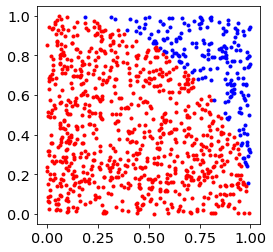

In [2]:
import random

N = 1000

plt.figure(figsize = (4, 4))
for i in range(N):
    
    x = random.uniform(0, 1)
    y = random.uniform(0, 1)
    
    if x ** 2 + y ** 2 < 1:
        plt.plot(x, y, "r.")
    else:
        plt.plot(x, y, "b.")

## Example 2: Two Curves in One Figure

In [3]:
import numpy as np

x = np.linspace(-np.pi, np.pi, 20)
y1, y2 = np.cos(x), np.sin(x)

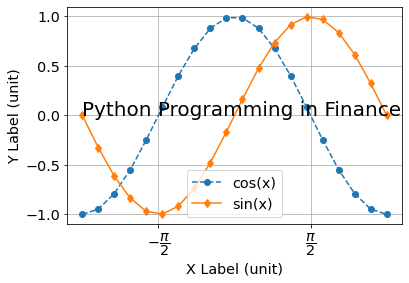

In [4]:
import matplotlib.pyplot as plt

gcf = plt.figure()
plt.plot(x, y1, marker = "o", linestyle = "--")
plt.plot(x, y2, marker = "d")

plt.xlabel("X Label (unit)")
plt.xticks([-np.pi / 2, np.pi / 2], labels = ["$-\dfrac{\pi}{2}$", "$\dfrac{\pi}{2}$"])
plt.ylabel("Y Label (unit)")
plt.legend(["cos(x)", "sin(x)"], loc = "lower center")
plt.text(-np.pi, 0, "Python Programming in Finance", fontsize = 20)
plt.grid(True)
plt.show()

In [5]:
gcf.savefig("example.jpg", dpi = 300)
gcf.savefig("example.pdf", dpi = 300)

## Example 3: Dual Y-Axis Plot

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Automatic legend placement (loc='best') not implemented for figure legend. Falling back on 'upper right'. This will raise an exception in 3.3.
  if sys.path[0] == '':


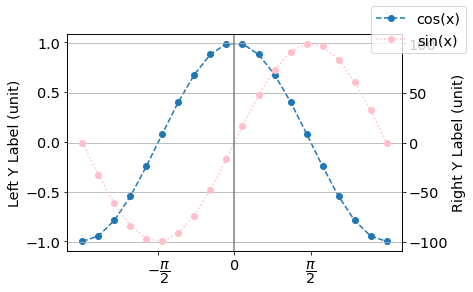

In [6]:
import matplotlib.pyplot as plt

y3 = 100 * y2

fig, ax1 = plt.subplots()
ax1.plot(x, y1, marker = "o", linestyle = "--")
ax1.set_ylabel("Left Y Label (unit)")

ax2 = ax1.twinx()
ax2.plot(x, y3, color = "pink", linestyle = ":", marker = "o")
ax2.set_ylabel("Right Y Label (unit)")
fig.legend(["cos(x)", "sin(x)"], loc = "best")

plt.axvline(x = 0, color = "gray")
plt.xticks([-np.pi / 2, 0, np.pi / 2], labels = ["$-\dfrac{\pi}{2}$", "0", "$\dfrac{\pi}{2}$"])
plt.xlabel("X Label (unit)")
plt.grid(True)

## Example 4: Subplots

In [7]:
!wget https://www.csie.ntu.edu.tw/~d00922011/python/data/2330tw.xlsx

--2021-06-03 06:39:45--  https://www.csie.ntu.edu.tw/~d00922011/python/data/2330tw.xlsx
Resolving www.csie.ntu.edu.tw (www.csie.ntu.edu.tw)... 140.112.30.26
Connecting to www.csie.ntu.edu.tw (www.csie.ntu.edu.tw)|140.112.30.26|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 163174 (159K) [application/vnd.openxmlformats-officedocument.spreadsheetml.sheet]
Saving to: ‘2330tw.xlsx.5’

2330tw.xlsx.5       100%[===================>] 159.35K   324KB/s    in 0.5s    

2021-06-03 06:39:47 (324 KB/s) - ‘2330tw.xlsx.5’ saved [163174/163174]



In [8]:
import pandas as pd

df = pd.read_excel("2330tw.xlsx")

df.sort_values(by = "Date", inplace = True, ascending = True) # df = df.sort_values(by = "Date", ascending = True)
df["Date"] = pd.to_datetime(df["Date"]) # convert date strings to datetime objects
df.set_index("Date", inplace = True)

df

,Open,High,Low,Close,Volume
Date,,,,,
2007-01-02,67.8,68.0,67.3,67.7,1768131
2007-01-03,67.8,68.7,67.5,68.0,2875024
2007-01-04,67.7,68.1,67.6,67.7,1514454
2007-01-05,67.5,67.7,66.5,66.9,2048997
2007-01-08,66.1,66.5,65.7,65.8,1595029
...,...,...,...,...,...
2021-04-13,604.0,613.0,604.0,605.0,16638680
2021-04-14,608.0,612.0,600.0,612.0,18868308
2021-04-15,612.0,619.0,607.0,619.0,22332532


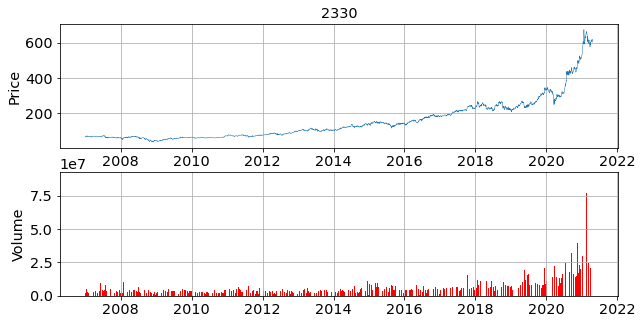

In [9]:
plt.figure(figsize = (10, 5))
plt.subplot(211)
plt.title("2330")
plt.plot(df.index, df["Close"], linewidth = 0.5)
plt.grid(True)
plt.ylabel("Price")

plt.subplot(212)
plt.bar(df.index, df["Volume"], color = "r")
plt.grid(True)
plt.ylabel("Volume")

plt.savefig("2330.png", dpi = 300) # This line should be placed before show().
plt.show()

## Example 5: 3D Plot


In [10]:
!wget https://www.csie.ntu.edu.tw/~d00922011/python/data/sp500_imv.csv

--2021-06-03 06:39:55--  https://www.csie.ntu.edu.tw/~d00922011/python/data/sp500_imv.csv
Resolving www.csie.ntu.edu.tw (www.csie.ntu.edu.tw)... 140.112.30.26
Connecting to www.csie.ntu.edu.tw (www.csie.ntu.edu.tw)|140.112.30.26|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 712 [text/csv]
Saving to: ‘sp500_imv.csv.5’

sp500_imv.csv.5     100%[===================>]     712  --.-KB/s    in 0s      

2021-06-03 06:39:56 (33.4 MB/s) - ‘sp500_imv.csv.5’ saved [712/712]



In [11]:
import pandas as pd

df = pd.read_csv('sp500_imv.csv', index_col  = 0)
df

,0.85,0.9,0.95,1,1.05,1.1,1.15,1.2,1.3,1.4
0.175,0.190,0.168,0.133,0.113,0.102,0.097,0.120,0.142,0.169,0.200
0.425,0.177,0.155,0.138,0.125,0.109,0.103,0.100,0.114,0.130,0.150
0.695,0.172,0.157,0.144,0.133,0.118,0.104,0.100,0.101,0.108,0.124
0.940,0.171,0.159,0.149,0.137,0.127,0.113,0.106,0.103,0.100,0.110
1.000,0.171,0.159,0.150,0.138,0.128,0.115,0.107,0.103,0.099,0.108
1.500,0.169,0.160,0.151,0.142,0.133,0.124,0.119,0.113,0.107,0.102
2.000,0.169,0.161,0.153,0.145,0.137,0.130,0.126,0.119,0.115,0.111
3.000,0.168,0.161,0.155,0.149,0.143,0.137,0.133,0.128,0.124,0.123
4.000,0.168,0.162,0.157,0.152,0.148,0.143,0.139,0.135,0.130,0.128
5.000,0.168,0.164,0.159,0.154,0.151,0.148,0.144,0.140,0.136,0.132


In [12]:
tenor = df.index.values
moneyness = list(map(float, df.columns.values))
implv = df[df.columns.values][:].values
X, Y = np.meshgrid(moneyness, tenor)

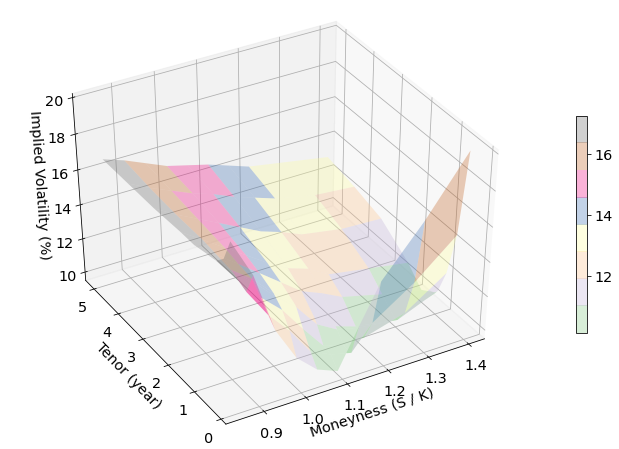

In [13]:
from matplotlib import cm

fig = plt.figure(figsize = (12, 8))
ax = fig.add_subplot(111, projection = "3d")
surf = ax.plot_surface(X, Y, implv * 100, cmap = cm.Accent, alpha = 0.3)

fig.colorbar(surf, shrink = 0.5)
ax.view_init(azim = 240, elev = 40)
ax.set_xlabel("Moneyness (S / K)")
ax.set_ylabel("Tenor (year)")
ax.set_zlabel("Implied Volatility (%)")
plt.show()

# Extended Package: seaborn
- Official seaborn tutorial: https://seaborn.pydata.org/tutorial.html

In [14]:
import seaborn as sns

sns.set_theme(style = "whitegrid")

### Example 1

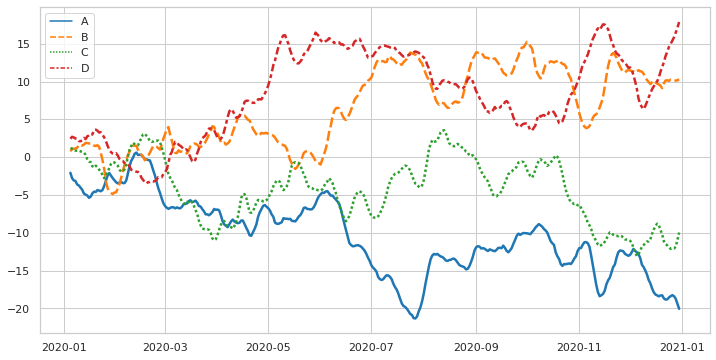

In [15]:
rs = np.random.RandomState(365)
values = rs.randn(365, 4).cumsum(axis = 0)
dates = pd.date_range("2020-01-01", periods = 365, freq = "D")
data = pd.DataFrame(values, dates, columns = ["A", "B", "C", "D"])
data = data.rolling(5).mean()

plt.figure(figsize = (12, 6))
sns.lineplot(data = data, palette = "tab10", linewidth = 2.5)

### Example 2

In [16]:
sns.set_theme(style = "darkgrid")

In [17]:
tips = sns.load_dataset("tips")
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


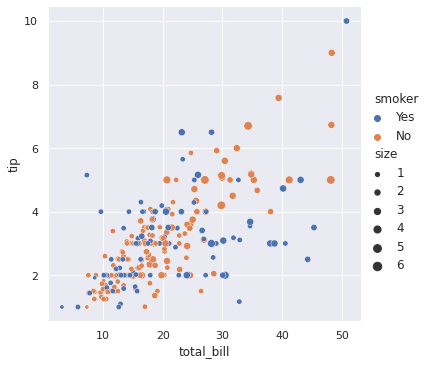

In [18]:
sns.relplot(x = "total_bill", y = "tip", hue = "smoker", size = "size", data = tips)

### Example 3

In [19]:
!wget https://www.csie.ntu.edu.tw/~d00922011/python/data/all_stocks.xlsx

--2021-06-03 06:39:59--  https://www.csie.ntu.edu.tw/~d00922011/python/data/all_stocks.xlsx
Resolving www.csie.ntu.edu.tw (www.csie.ntu.edu.tw)... 140.112.30.26
Connecting to www.csie.ntu.edu.tw (www.csie.ntu.edu.tw)|140.112.30.26|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 97866 (96K) [application/vnd.openxmlformats-officedocument.spreadsheetml.sheet]
Saving to: ‘all_stocks.xlsx.3’

all_stocks.xlsx.3   100%[===================>]  95.57K   389KB/s    in 0.2s    

2021-06-03 06:39:59 (389 KB/s) - ‘all_stocks.xlsx.3’ saved [97866/97866]



In [20]:
tbl = pd.read_excel("all_stocks.xlsx")
tbl["E/P Ratio"] = tbl["E/P Ratio"].apply(lambda x : float(x) if x != "-" else 0)
tbl["P/B Ratio"] = tbl["P/B Ratio"].apply(lambda x : float(x) if x != "-" else 0)
tbl["ID"] = tbl["Stock ID"].apply(lambda x : x.split(" ")[0])
tbl["Name"] = tbl["Stock ID"].apply(lambda x : "".join(x.split(" ")[1:]))
del tbl["Stock ID"]
tbl = tbl.iloc[:, [5, 6, 0, 1, 2, 3, 4]]
tbl.set_index("ID", inplace = True)
tbl

,Name,Market Type,Category,Market Value (M),E/P Ratio,P/B Ratio
ID,,,,,,
1101,台泥,TSE,水泥工業,315022,12.44,1.50
1102,亞泥,TSE,水泥工業,174767,10.16,1.16
1103,嘉泥,TSE,水泥工業,17588,7.91,0.58
1104,環泥,TSE,水泥工業,15196,10.62,0.80
1108,幸福,TSE,水泥工業,5808,16.49,1.31
...,...,...,...,...,...,...
9949,琉園,OTC,文化創意業,520,0.00,1.06
9950,萬國通,OTC,塑膠工業,1640,0.00,1.88
9951,皇田,OTC,電機機械,6748,12.08,2.36


In [21]:
categories = np.unique(tbl["Category"])
print(categories)
print(len(categories))

['光電業' '其他' '其他電子業' '化學工業' '半導體' '塑膠工業' '存託憑證' '建材營造' '文化創意業' '橡膠工業'
 '水泥工業' '汽車工業' '油電燃氣業' '玻璃陶瓷' '生技醫療' '紡織纖維' '航運業' '觀光事業' '貿易百貨' '資訊服務業'
 '農業科技' '通信網路業' '造紙工業' '金融業' '鋼鐵工業' '電器電纜' '電子商務' '電子通路業' '電子零組件' '電機機械'
 '電腦及週邊' '食品工業']
32


In [22]:
mask1 = tbl["E/P Ratio"] < 30
mask2 = tbl["E/P Ratio"] > 5
mask = mask1 & mask2
tbl = tbl.loc[mask, :]
tbl

,Name,Market Type,Category,Market Value (M),E/P Ratio,P/B Ratio
ID,,,,,,
1101,台泥,TSE,水泥工業,315022,12.44,1.50
1102,亞泥,TSE,水泥工業,174767,10.16,1.16
1103,嘉泥,TSE,水泥工業,17588,7.91,0.58
1104,環泥,TSE,水泥工業,15196,10.62,0.80
1108,幸福,TSE,水泥工業,5808,16.49,1.31
...,...,...,...,...,...,...
8938,明安,OTC,其他,9945,11.36,2.09
8941,關中,OTC,貿易百貨,1169,12.86,1.42
8942,森鉅,OTC,其他,11393,8.51,1.55


In [23]:
tbl["Market Value (log10 M)"] = np.log10(tbl["Market Value (M)"])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


<Figure size 864x432 with 0 Axes>

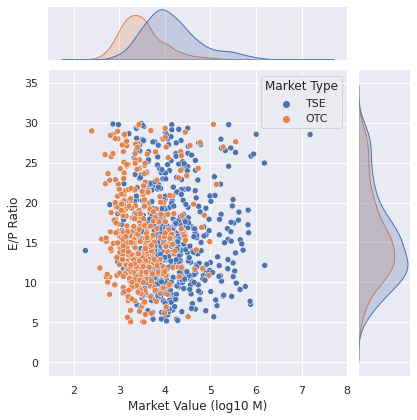

In [24]:
plt.figure(figsize = (12, 6))
sns.jointplot(data = tbl, x = "Market Value (log10 M)", y = "E/P Ratio", hue = "Market Type")

# Financial Plot Package: mplfinance
- Financial plots: [mplfinance](https://github.com/DanielGoldfarb/mplfinance)

In [25]:
!pip install --upgrade mplfinance

Requirement already up-to-date: mplfinance in /usr/local/lib/python3.7/dist-packages (0.12.7a17)


In [26]:
import mplfinance as mpf

### Example: Candlestick Chart
- https://en.wikipedia.org/wiki/Candlestick_chart

In [27]:
from pandas_datareader import data as pdr

stock = "AAPL"
tbl = pdr.get_data_yahoo(stock, start = "2021-01-01")
del tbl["Adj Close"]

tbl.head()

,High,Low,Open,Close,Volume
Date,,,,,
2021-01-04,133.610001,126.760002,133.520004,129.410004,143301900.0
2021-01-05,131.740005,128.429993,128.889999,131.009995,97664900.0
2021-01-06,131.050003,126.379997,127.720001,126.599998,155088000.0
2021-01-07,131.630005,127.860001,128.360001,130.919998,109578200.0
2021-01-08,132.630005,130.229996,132.429993,132.050003,105158200.0


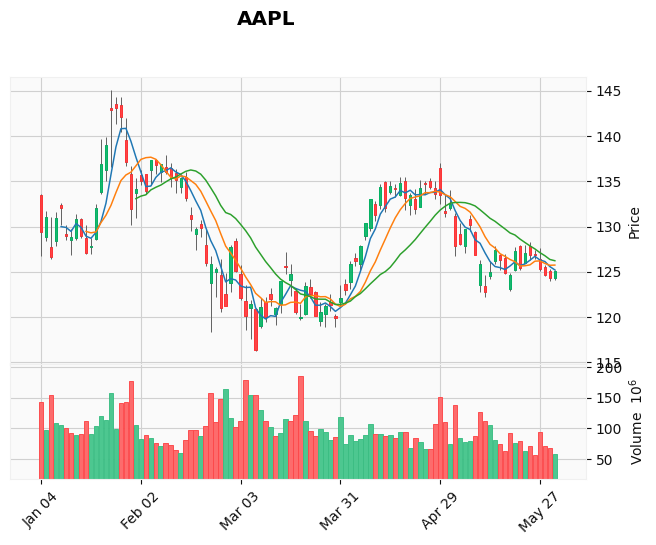

In [28]:
mpf.plot(tbl, type = "candle", style = "yahoo", volume = True, mav = (5, 10, 20), title = "AAPL", ylabel = "Price")

- Mplfinance Styles: https://github.com/matplotlib/mplfinance/blob/master/examples/styles.ipynb

In [29]:
curr_style = mpf.make_mpf_style(marketcolors = mpf.make_marketcolors(up = "r", down = "g"), gridaxis = "both")

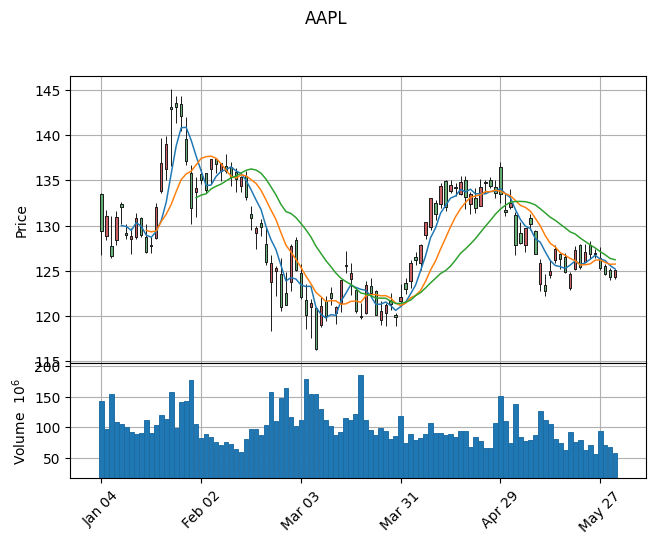

In [30]:
mpf.plot(tbl, type = "candle", style = curr_style, volume = True, mav = (5, 10, 20), title = "AAPL", ylabel = "Price")